# 4.9 Task: Visualizations - Part 2

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

This script contains the following points:
1. Importing combined orders, product, and customer data set
2. Creating multiple visualizations using new matplotlib, seaborn, and scipy python libraries
3. Performing additional requested data analysis via visualizations

In [2]:
path=r'C:\Users\dell\Desktop\Career Foundry\0423_Instacart Analysis'

In [3]:
# Import pickle instacart merged data set
instacart_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_merge.pkl'))

# Graphs from Exercise 4.9

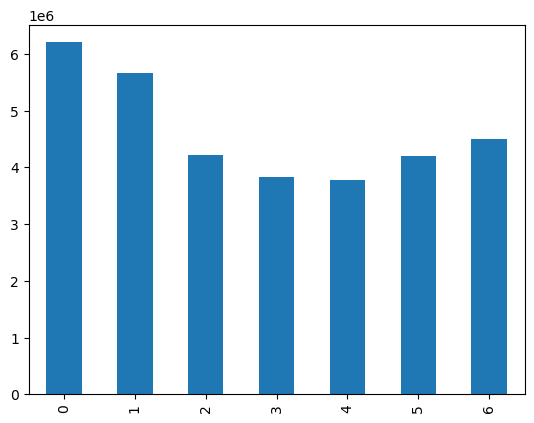

In [4]:
# Create a bar chart (sort by days of week)

bar= instacart_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

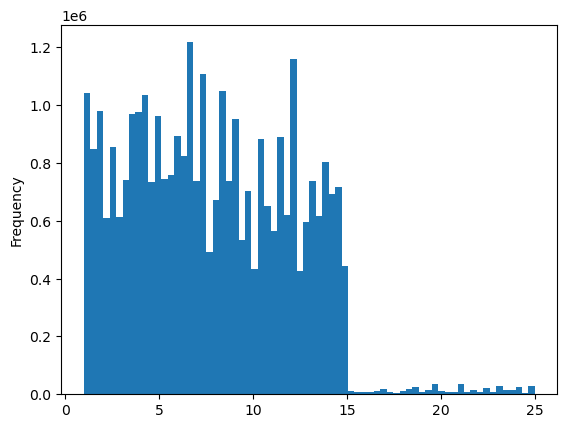

In [5]:
# Create a histogram

instacart_merge.loc[instacart_merge['prices']>100, 'prices'] = np.nan
hist = instacart_merge['prices'].plot.hist(bins = 70)

<Axes: xlabel='prices', ylabel='prices'>

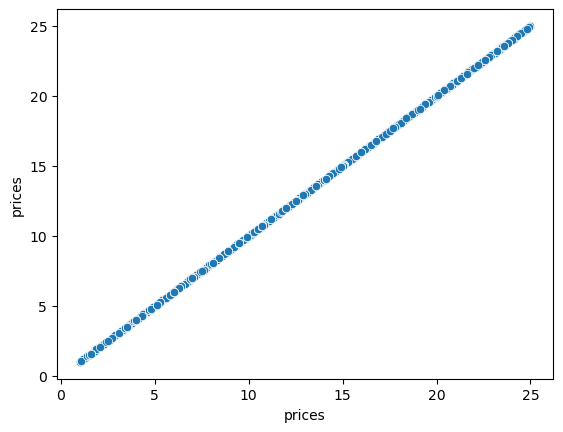

In [6]:
# Create a scatterplot (not including inaccurate max values)

sns.scatterplot(x='prices',y='prices',data=instacart_merge)

# Randomization

In [7]:
np.random.seed(4)

In [8]:
# Create a 70/30 random sample list with True/False values

dev = np.random.rand(len(instacart_merge)) <=0.7

In [9]:
# Store 70% of sample in big and 30% is small dataframes

big = instacart_merge[dev]
small = instacart_merge[~dev]

In [10]:
# Confirm 70% of total dataframe

len(big) / len(instacart_merge)

0.7000111001871664

In [11]:
# Reducing columns used in sample

df_small_cart = small[['orders_day_of_week','prices']]

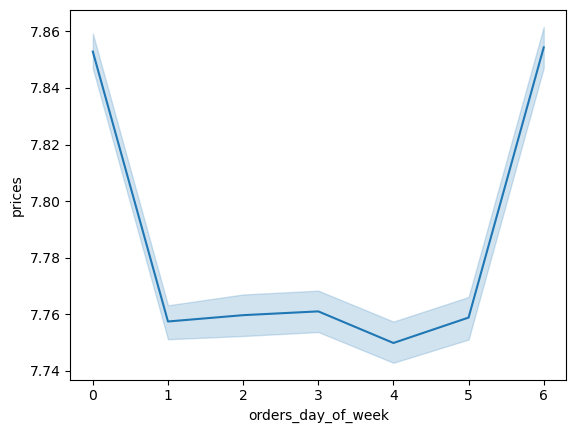

In [12]:
# Create a line graph

line =sns.lineplot(data = df_small_cart, x= 'orders_day_of_week', y = 'prices')

# Additional requested analysis

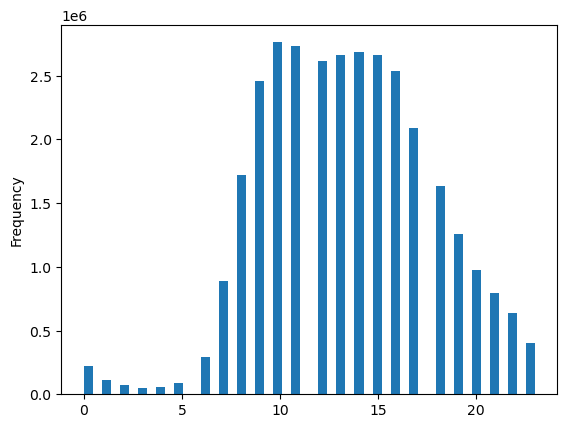

In [13]:
# Create a histogram for sales by hour of day

hist_hours = instacart_merge['order_hour_of_day'].plot.hist(bins = 50)

The historgram shows peak order hours begin at 9 am and end after 5 pm. 

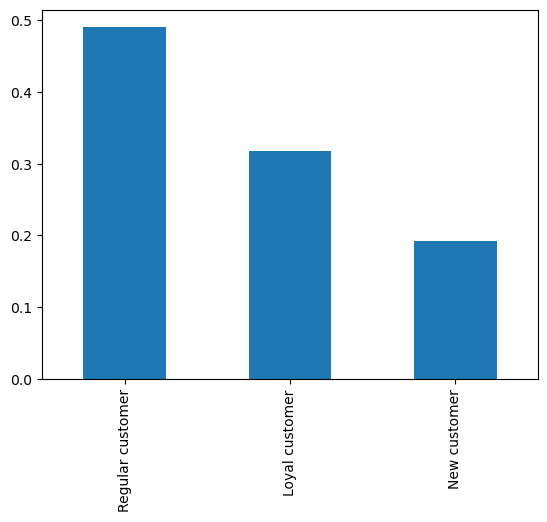

In [14]:
# Create a bar chart (sort by days of week)

bar_loyalflag= instacart_merge['loyalty_flag'].value_counts('order_id').plot.bar()

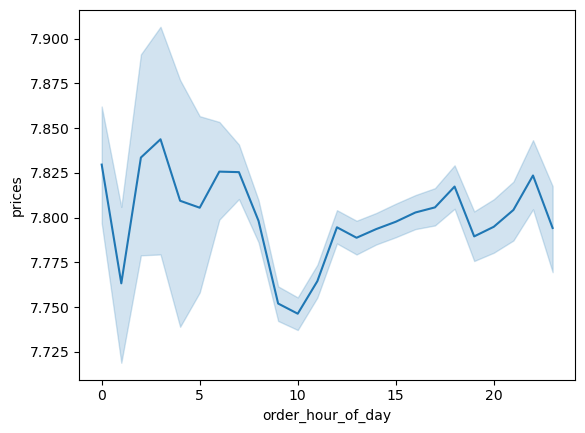

In [15]:
# Create a line graph for hours of the day

df_small_cart_hours = small[['order_hour_of_day','prices']]
line_hourofday =sns.lineplot(data = df_small_cart_hours, x= 'order_hour_of_day', y = 'prices')

Most expensive items are purchased at aprox. 4 am with less expensive items purchased around 10 am. Price per hour is fairly consistent in the afternoon hours.

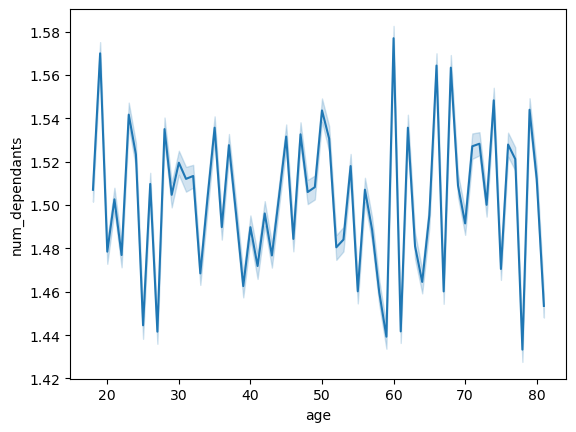

In [16]:
# Create a line graph for age and number of dependents

df_small_age_dependants = small[['age','num_dependants']]
line_age_dependants =sns.lineplot(data = df_small_age_dependants, x= 'age', y = 'num_dependants')

While there looks to be a lot of variation throughout all age categories, the average number of dependants is roughly 1.5 for all age groups

In [17]:
df_small_age_dependants.groupby(['age','num_dependants']).value_counts()

age  num_dependants
18   0                 37542
     1                 38503
     2                 34506
     3                 39581
19   0                 33159
                       ...  
80   3                 39716
81   0                 43363
     1                 33865
     2                 37811
     3                 37323
Length: 256, dtype: int64

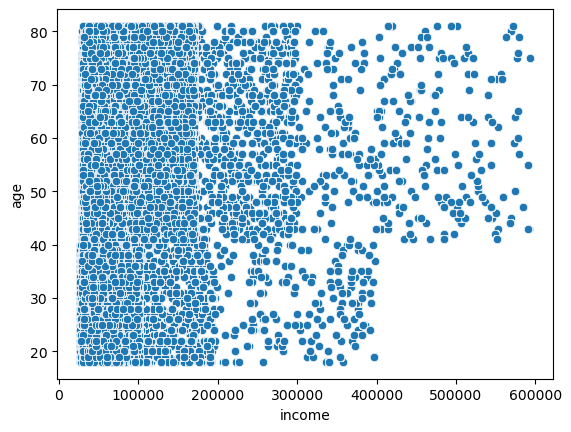

In [18]:
# Create a scatterplot

scatterplot_age_income = sns.scatterplot(x='income',y='age',data=instacart_merge)

Customer under 40 generally have an income under 200,000 and none of them have incomes over 400,000. After 40, more individuals have incomes up to 300,000. Incomes for individuals over 40 peaks at 600,000.00.

In [20]:
# Export of visualizations

hist_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hours.png'))
bar_loyalflag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalflag.png'))
line_hourofday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourofday.png'))
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))                                     